In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTENC

In [2]:
df = pd.read_csv(r'C:\Users\CLAHAXY8W\PycharmProjects\customer_churn\customer_churn\data\raw\raw_data.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.apply(lambda x: x.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce').fillna(0)
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
for i in df:
    display(df[i].value_counts())
    print('='*100)

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Unbalanced class, we will need to handle it:**

preprocessing steps:
- see correlation, to drop highly correlated features - as final step (not priority)
- Split datasets into train, test  
- Create 3 train and tests versions, to see the effect of size imbalance for target class
    - without any imbalanced
    - with SMOTE
    - With resampling
- Create 3 Notebooks to avoid having super complicated one
- Test the 3 versions on:
    - Logistic
    - KNN
    - SVM
    - DT
    - RF
    - Adaboost
    - Gradient boosting
    - XGBoost
- Do PyCaret to see what AutoML model is best
- Do feature selections on PyCaret, re-run them on selected features
- Do GridSearch for the choosen one

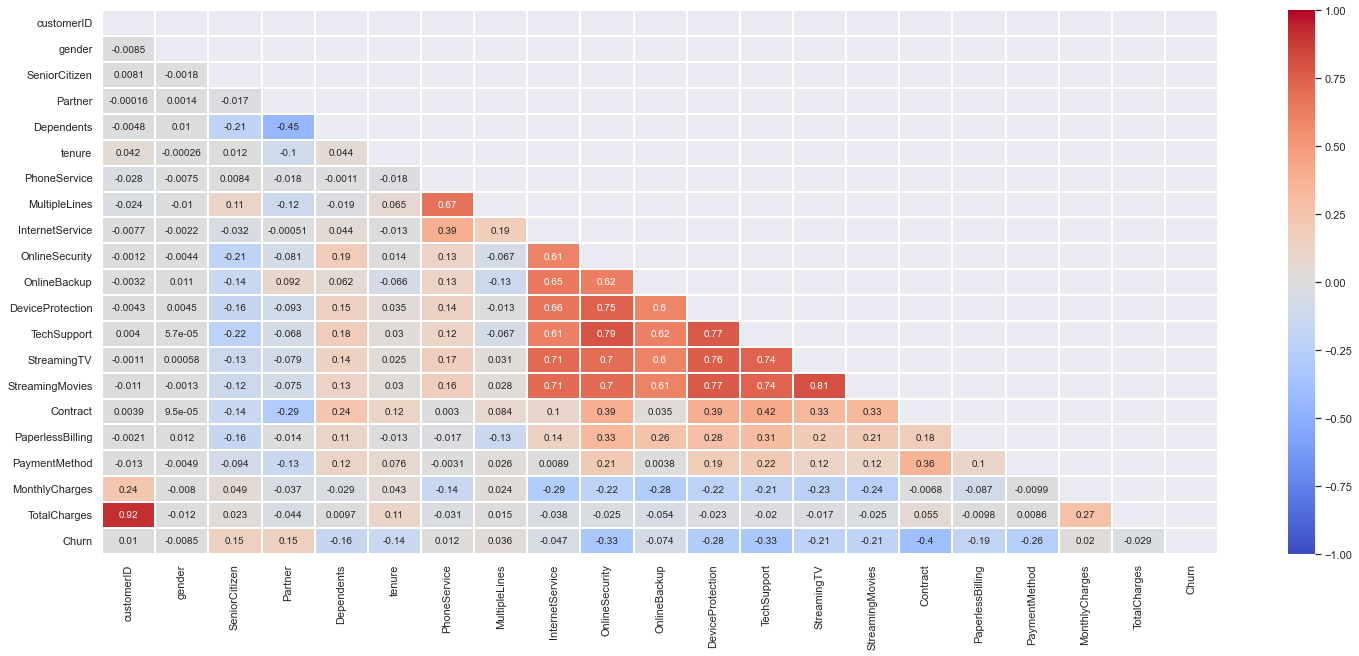

In [13]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, 
                 annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Many features are correlated, such as:
- Streaming TV and Streaming Movies
- DeviceProtection vs Streaming TV and Streaming Movies
- TechSupport and OnlineSecurity

Will comback to look at them when I am done with dataset imbalance, if no time then ignore it - not as important of step

In [14]:
df.shape

(7032, 21)

# 2. SMOTE

In [15]:
smoteBalance = {}

**split datasets**

In [16]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train_1.shape, X_test_1.shape

((4922, 20), (2110, 20))

In [17]:
X_train = X_train_1.drop(columns=['customerID'])
X_test = X_test_1.drop(columns=['customerID'])
y_train = y_train_1.drop(columns=['customerID'])
y_test = y_test_1.drop(columns=['customerID'])
X_train.shape, X_test.shape

((4922, 19), (2110, 19))

In [18]:
categorical_feature_idxs = np.where(X_train.dtypes == "object")[0]
categorical_feature_idxs

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [19]:
smtnc = SMOTENC(categorical_features=categorical_feature_idxs)
X_train_smote, y_train_smote = smtnc.fit_resample(X_train, y_train)

In [20]:
y_train_smote.value_counts()

Yes    3614
No     3614
Name: Churn, dtype: int64

In [21]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

categorical_features, numeric_features

(['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

In [22]:
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

In [23]:
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer,numeric_features),
                                               ("cat", categorical_transformer,categorical_features)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

**Logistic Regression**

In [24]:
lr_model = LogisticRegression(random_state=42, solver='liblinear')
pipeline_lr = Pipeline(steps=[("pre_process", preprocessor),
                              ("model", lr_model)])
pipeline_lr

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 LogisticRegression(random_state=42, solver='liblinear'))])

              precision    recall  f1-score   support

          No       0.89      0.75      0.81      1549
         Yes       0.52      0.73      0.61       561

    accuracy                           0.75      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.75      0.76      2110



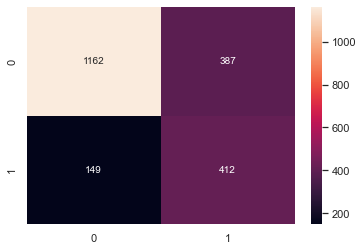

In [25]:
pipeline_lr.fit(X_train_smote, y_train_smote)
y_pred = pipeline_lr.predict(X_test)

class_labels = pipeline_lr.named_steps['model'].classes_

print(classification_report(y_test, y_pred))
 
f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

tp = np.diag(confusion_matrix(y_test, y_pred))[1]
tn = (confusion_matrix(y_test, y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, y_pred)))[1]

smoteBalance['Logistic_Regression'] = [f1,tp,tn]

cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt='.0f');

**KNN**

In [26]:
knn = KNeighborsClassifier()
pipeline_knn = Pipeline([("pre_process", preprocessor),
                         ("model", knn)])
pipeline_knn

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', KNeighborsClassifier())])

              precision    recall  f1-score   support

          No       0.86      0.73      0.79      1549
         Yes       0.47      0.67      0.56       561

    accuracy                           0.71      2110
   macro avg       0.67      0.70      0.67      2110
weighted avg       0.76      0.71      0.73      2110



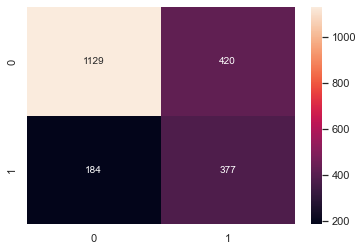

In [27]:
pipeline_knn.fit(X_train_smote, y_train_smote)
y_pred = pipeline_knn.predict(X_test)

class_labels = pipeline_knn.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

tp = np.diag(confusion_matrix(y_test, y_pred))[1]
tn = (confusion_matrix(y_test, y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, y_pred)))[1]

smoteBalance['KNN'] = [f1,tp,tn]



cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt='.0f');

**SVM**

In [28]:
svc = LinearSVC(random_state=42)
pipeline_svc = Pipeline([("pre_process", preprocessor),
                         ("model", svc)])
pipeline_svc

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LinearSVC(random_state=42))])

              precision    recall  f1-score   support

          No       0.89      0.74      0.81      1549
         Yes       0.51      0.74      0.60       561

    accuracy                           0.74      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.74      0.75      2110



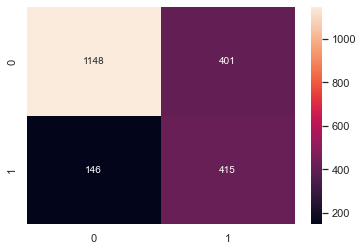

In [29]:
pipeline_svc.fit(X_train_smote, y_train_smote)
y_pred = pipeline_svc.predict(X_test)

class_labels = pipeline_svc.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

tp = np.diag(confusion_matrix(y_test, y_pred))[1]
tn = (confusion_matrix(y_test, y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, y_pred)))[1]

smoteBalance['SVM'] = [f1,tp,tn]



cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt='.0f');

**Tree Based Models**

In [30]:
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])

numeric_transformer = Pipeline(steps=[("knn_imputer", KNNImputer(n_neighbors=5))])

preprocessor_new = ColumnTransformer(transformers=[("num", numeric_transformer,numeric_features),
                                               ("cat", categorical_transformer,categorical_features)])

**Decision Tree Classifier**

In [31]:
dtree = DecisionTreeClassifier(random_state=42)
pipeline_dtree = Pipeline([("pre_process", preprocessor_new),
                         ("model", dtree)])
pipeline_dtree

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

              precision    recall  f1-score   support

          No       0.83      0.79      0.81      1549
         Yes       0.48      0.55      0.51       561

    accuracy                           0.72      2110
   macro avg       0.66      0.67      0.66      2110
weighted avg       0.74      0.72      0.73      2110



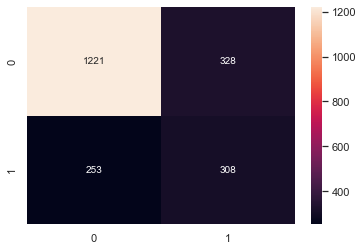

In [32]:
pipeline_dtree.fit(X_train_smote, y_train_smote)
y_pred = pipeline_dtree.predict(X_test)

class_labels = pipeline_dtree.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

tp = np.diag(confusion_matrix(y_test, y_pred))[1]
tn = (confusion_matrix(y_test, y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, y_pred)))[1]

smoteBalance['Decision_Tree'] = [f1,tp,tn]


cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt='.0f');

**RandomForest**

In [33]:
rf = RandomForestClassifier(random_state=42)
pipeline_rf = Pipeline([("pre_process", preprocessor_new),
                         ("model", rf)])
pipeline_rf

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

          No       0.84      0.84      0.84      1549
         Yes       0.55      0.56      0.56       561

    accuracy                           0.76      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.76      0.76      0.76      2110



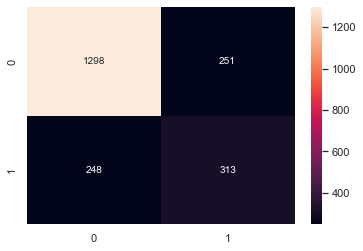

In [34]:
pipeline_rf.fit(X_train_smote, y_train_smote)
y_pred = pipeline_rf.predict(X_test)

class_labels = pipeline_rf.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

tp = np.diag(confusion_matrix(y_test, y_pred))[1]
tn = (confusion_matrix(y_test, y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, y_pred)))[1]

smoteBalance['RandomForest'] = [f1,tp,tn]



cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt='.0f');

**Adaboost**

In [35]:
ada_boost = AdaBoostClassifier(random_state=42)
pipeline_ada_boost = Pipeline([("pre_process", preprocessor_new),
                         ("model", ada_boost)])
pipeline_ada_boost

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', AdaBoostClassifier(random_state=42))])

              precision    recall  f1-score   support

          No       0.90      0.75      0.81      1549
         Yes       0.52      0.76      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.75      0.76      2110



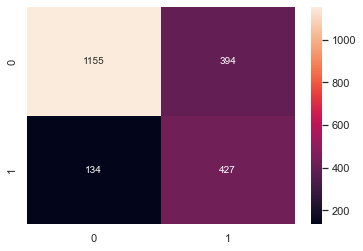

In [36]:
pipeline_ada_boost.fit(X_train_smote, y_train_smote)
y_pred = pipeline_ada_boost.predict(X_test)

class_labels = pipeline_ada_boost.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

tp = np.diag(confusion_matrix(y_test, y_pred))[1]
tn = (confusion_matrix(y_test, y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, y_pred)))[1]

smoteBalance['AdaBoost'] = [f1,tp,tn]




cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt='.0f');

**Gradient Boost**

In [37]:
gbm = GradientBoostingClassifier(random_state=42)
pipeline_gbm = Pipeline([("pre_process", preprocessor_new),
                         ("model", gbm)])
pipeline_gbm

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

              precision    recall  f1-score   support

          No       0.89      0.78      0.83      1549
         Yes       0.54      0.73      0.62       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.76      0.77      2110



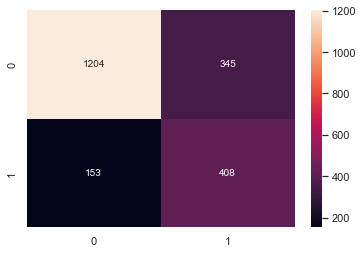

In [38]:
pipeline_gbm.fit(X_train_smote, y_train_smote)
y_pred = pipeline_gbm.predict(X_test)

class_labels = pipeline_gbm.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

tp = np.diag(confusion_matrix(y_test, y_pred))[1]
tn = (confusion_matrix(y_test, y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, y_pred)))[1]

smoteBalance['GradientBoost'] = [f1,tp,tn]



cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, fmt='.0f');

**XGBoost**

In [39]:
xgb = XGBClassifier(random_state=42)
pipeline_xgb = Pipeline([("pre_process", preprocessor_new),
                         ("model", xgb)])
pipeline_xgb

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity'...
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=42, reg_alpha=None, reg_lambda=None, ...))])

In [40]:
# remapping XGBoosts class from Yes NO to 0,1

y_train_2 = y_train_smote.map({'No': 0, "Yes":1 })
y_test_2 = y_test.map({'No': 0, "Yes":1 })



              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1549
           1       0.55      0.62      0.58       561

    accuracy                           0.77      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.77      0.77      0.77      2110



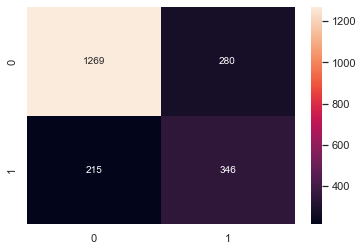

In [41]:
pipeline_xgb.fit(X_train_smote, y_train_2)
y_pred = pipeline_xgb.predict(X_test)

class_labels = pipeline_xgb.named_steps['model'].classes_

print(classification_report(y_test_2, y_pred))

f1 = round(f1_score(y_test_2, y_pred, average='weighted'), 3)
tp = np.diag(confusion_matrix(y_test_2, y_pred))[1]
tn = (confusion_matrix(y_test_2, y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test_2, y_pred)))[1]

smoteBalance['XGBoost'] = [f1,tp,tn]


cf = confusion_matrix(y_test_2, y_pred)
sns.heatmap(cf, annot=True, fmt='.0f');

**Compare Models**

In [42]:
SmoteBalance = pd.DataFrame.from_dict(smoteBalance, orient='index')

SmoteBalance.columns = ['F1-Score','TP','FP']

SmoteBalance['Precision%'] = round((SmoteBalance['TP'] / (SmoteBalance['TP'] + SmoteBalance['FP']))*100,2)

cost = (SmoteBalance['TP'] + SmoteBalance['FP'])*100
rev = SmoteBalance['TP'] * 1000

SmoteBalance['Business_Net_win'] = rev - cost

SmoteBalance.sort_values(by='F1-Score',ascending=False)

,F1-Score,TP,FP,Precision%,Business_Net_win
GradientBoost,0.773,408,345,54.18,332700
XGBoost,0.769,346,280,55.27,283400
RandomForest,0.764,313,251,55.50,256600
AdaBoost,0.762,427,394,52.01,344900
Logistic_Regression,0.758,412,387,51.56,332100
SVM,0.753,415,401,50.86,333400
Decision_Tree,0.730,308,328,48.43,244400
KNN,0.727,377,420,47.30,297300


In [43]:
num_features = list(pipeline_xgb['pre_process'].transformers_[0][2])
cat_features = list(pipeline_xgb['pre_process'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features))
num_features, cat_features

(['tenure', 'MonthlyCharges', 'TotalCharges'],
 ['gender_Female',
  'gender_Male',
  'SeniorCitizen_No',
  'SeniorCitizen_Yes',
  'Partner_No',
  'Partner_Yes',
  'Dependents_No',
  'Dependents_Yes',
  'PhoneService_No',
  'PhoneService_Yes',
  'MultipleLines_No',
  'MultipleLines_No phone service',
  'MultipleLines_Yes',
  'InternetService_DSL',
  'InternetService_Fiber optic',
  'InternetService_No',
  'OnlineSecurity_No',
  'OnlineSecurity_No internet service',
  'OnlineSecurity_Yes',
  'OnlineBackup_No',
  'OnlineBackup_No internet service',
  'OnlineBackup_Yes',
  'DeviceProtection_No',
  'DeviceProtection_No internet service',
  'DeviceProtection_Yes',
  'TechSupport_No',
  'TechSupport_No internet service',
  'TechSupport_Yes',
  'StreamingTV_No',
  'StreamingTV_No internet service',
  'StreamingTV_Yes',
  'StreamingMovies_No',
  'StreamingMovies_No internet service',
  'StreamingMovies_Yes',
  'Contract_Month-to-month',
  'Contract_One year',
  'Contract_Two year',
  'Paperless

In [44]:
feature_cols = num_features + cat_features
xgb_importances = pd.DataFrame(
    {"feature": feature_cols, "importance": np.round(xgb.feature_importances_, 3)}
)
xgb_importances = xgb_importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
xgb_importances.head(20)

,importance
feature,
Contract_Month-to-month,0.552
OnlineSecurity_No,0.066
InternetService_Fiber optic,0.058
PaymentMethod_Electronic check,0.031
TechSupport_No,0.028
InternetService_DSL,0.024
Dependents_No,0.017
StreamingTV_No,0.016
PaperlessBilling_No,0.014
